<a href="https://colab.research.google.com/github/ekumar84/CNN-Image-classification/blob/main/ML_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
print("Loading MNIST dataset...")
# Load a subset of MNIST for faster computation (you can use full dataset by removing n_samples)
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data[:10000]  # Using 10,000 samples for tutorial purposes
y = mnist.target[:10000]

print(f"Dataset shape: {X.shape}")
print(f"Number of features (pixels): {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target classes: {np.unique(y)}")

Loading MNIST dataset...
Dataset shape: (10000, 784)
Number of features (pixels): 784
Number of samples: 10000
Target classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


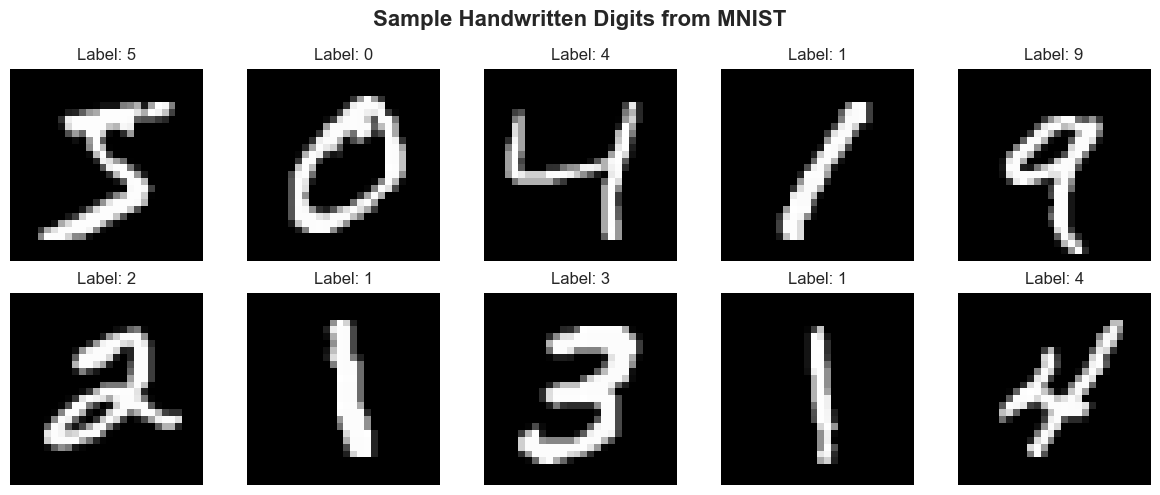

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample Handwritten Digits from MNIST', fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.35)

for i, ax in enumerate(axes.flat):
    # Reshape the flattened image back to 28x28
    image = X.iloc[i].values.reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {y.iloc[i]}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [3]:
print("Standardizing the data...")
print("\nWhy standardization?")
print("PCA is sensitive to the scale of features. Standardization ensures:")
print("1. All features contribute equally to the analysis")
print("2. Features with larger values don't dominate the principal components")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nOriginal data - Mean: {X.mean().mean():.2f}, Std: {X.std().mean():.2f}")
print(f"Scaled data - Mean: {X_scaled.mean():.2f}, Std: {X_scaled.std():.2f}")

Standardizing the data...

Why standardization?
PCA is sensitive to the scale of features. Standardization ensures:
1. All features contribute equally to the analysis
2. Features with larger values don't dominate the principal components

Original data - Mean: 33.44, Std: 49.19
Scaled data - Mean: -0.00, Std: 0.93


In [4]:
print("Applying PCA with all components...")

# Apply PCA with all possible components
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Transformed shape: {X_pca_full.shape}")
print(f"Number of components: {pca_full.n_components_}")

Applying PCA with all components...
Original shape: (10000, 784)
Transformed shape: (10000, 784)
Number of components: 784


In [5]:
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("=" * 70)
print("EXPLAINED VARIANCE ANALYSIS")
print("=" * 70)
print(f"Variance explained by first component: {explained_variance[0]:.4f} ({explained_variance[0]*100:.2f}%)")
print(f"Variance explained by first 10 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")
print(f"Variance explained by first 50 components: {cumulative_variance[49]:.4f} ({cumulative_variance[49]*100:.2f}%)")
print(f"Variance explained by first 100 components: {cumulative_variance[99]:.4f} ({cumulative_variance[99]*100:.2f}%)")

EXPLAINED VARIANCE ANALYSIS
Variance explained by first component: 0.0616 (6.16%)
Variance explained by first 10 components: 0.2988 (29.88%)
Variance explained by first 50 components: 0.5973 (59.73%)
Variance explained by first 100 components: 0.7559 (75.59%)


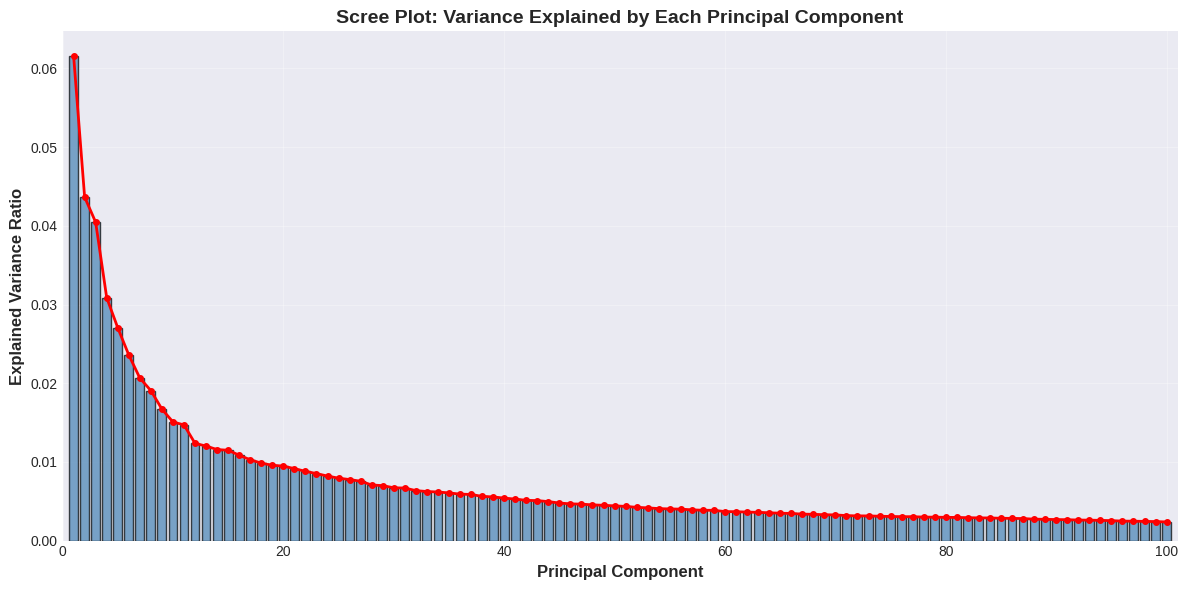

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot first 100 components for clarity
n_components_to_plot = 100
ax.bar(range(1, n_components_to_plot + 1), explained_variance[:n_components_to_plot],
       alpha=0.7, color='steelblue', edgecolor='black')
ax.plot(range(1, n_components_to_plot + 1), explained_variance[:n_components_to_plot],
        'ro-', linewidth=2, markersize=4)

ax.set_xlabel('Principal Component', fontsize=12, fontweight='bold')
ax.set_ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
ax.set_title('Scree Plot: Variance Explained by Each Principal Component',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, n_components_to_plot + 1)

plt.tight_layout()
plt.show()

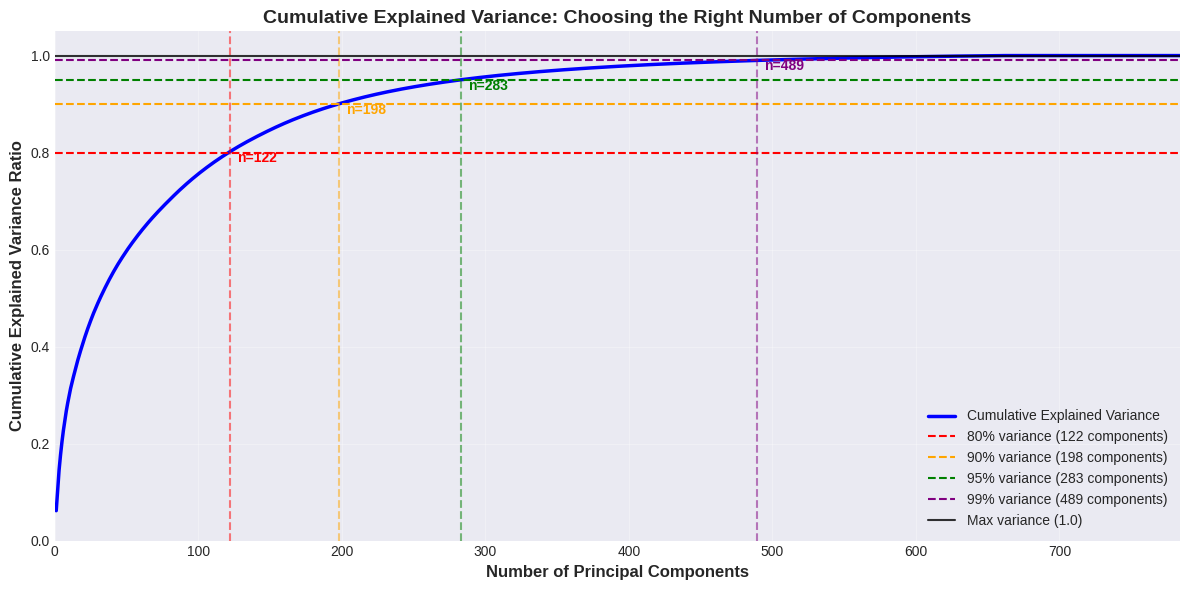

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot cumulative variance
ax.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
        'b-', linewidth=2.5, label='Cumulative Explained Variance')

# Add threshold lines
thresholds = [0.80, 0.90, 0.95, 0.99]
colors = ['red', 'orange', 'green', 'purple']

for threshold, color in zip(thresholds, colors):
    # Find number of components needed
    n_components = np.argmax(cumulative_variance >= threshold) + 1

    ax.axhline(y=threshold, color=color, linestyle='--', linewidth=1.5,
               label=f'{threshold*100:.0f}% variance ({n_components} components)')
    ax.axvline(x=n_components, color=color, linestyle='--', linewidth=1.5, alpha=0.5)

    # Annotate
    ax.text(n_components + 5, threshold - 0.02, f'n={n_components}',
            fontsize=10, color=color, fontweight='bold')

ax.set_xlabel('Number of Principal Components', fontsize=12, fontweight='bold')
ax.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12, fontweight='bold')
ax.set_title('Cumulative Explained Variance: Choosing the Right Number of Components',
             fontsize=14, fontweight='bold')
ax.axhline(y=1.0, color='black', linestyle='-', linewidth=1.5, alpha=0.8, label='Max variance (1.0)')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 784)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

In [8]:
print("=" * 70)
print("DECISION FRAMEWORK: CHOOSING THE NUMBER OF DIMENSIONS")
print("=" * 70)

print("\n📊 METHOD 1: VARIANCE THRESHOLD")
print("-" * 70)
for threshold in [0.80, 0.90, 0.95, 0.99]:
    n_comp = np.argmax(cumulative_variance >= threshold) + 1
    reduction = (1 - n_comp/X.shape[1]) * 100
    print(f"  • {threshold*100:.0f}% variance retained: {n_comp} components "
          f"(Reduction: {reduction:.1f}% from {X.shape[1]} dimensions)")

print("\n📐 METHOD 2: ELBOW METHOD")
print("-" * 70)
# Find elbow using second derivative
second_derivative = np.diff(explained_variance, n=2)
elbow_point = np.argmax(second_derivative > np.percentile(second_derivative, 95)) + 2
print(f"  • Elbow detected at approximately: {elbow_point} components")

print("\n🎯 METHOD 3: KAISER CRITERION")
print("-" * 70)
# Components with eigenvalue > 1 (for standardized data, this means variance > average)
kaiser_components = np.sum(pca_full.explained_variance_ > 1)
print(f"  • Components with eigenvalue > 1: {kaiser_components}")
print(f"  • Note: This method is strict and may retain too few components")

DECISION FRAMEWORK: CHOOSING THE NUMBER OF DIMENSIONS

📊 METHOD 1: VARIANCE THRESHOLD
----------------------------------------------------------------------
  • 80% variance retained: 122 components (Reduction: 84.4% from 784 dimensions)
  • 90% variance retained: 198 components (Reduction: 74.7% from 784 dimensions)
  • 95% variance retained: 283 components (Reduction: 63.9% from 784 dimensions)
  • 99% variance retained: 489 components (Reduction: 37.6% from 784 dimensions)

📐 METHOD 2: ELBOW METHOD
----------------------------------------------------------------------
  • Elbow detected at approximately: 2 components

🎯 METHOD 3: KAISER CRITERION
----------------------------------------------------------------------
  • Components with eigenvalue > 1: 144
  • Note: This method is strict and may retain too few components


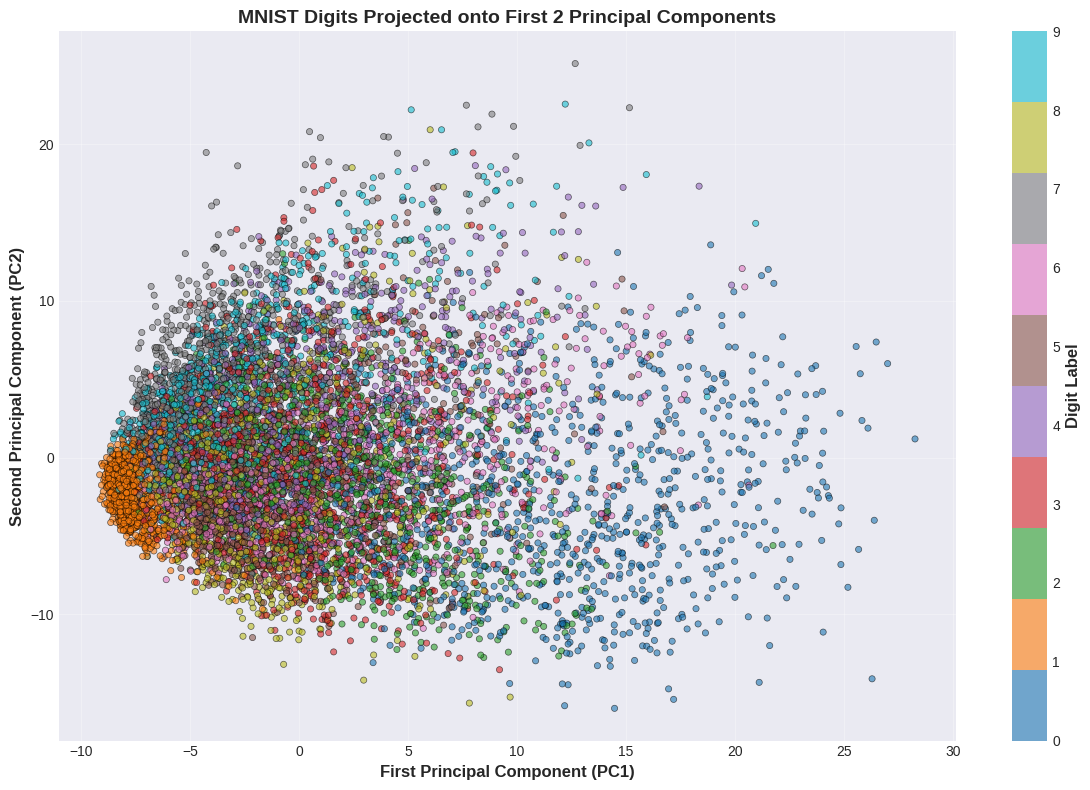


PC1 explains: 6.16% of variance
PC2 explains: 4.37% of variance
Total variance captured in 2D: 10.53%


In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

# Get 2D projection
X_2d = X_pca_dict[2]

# Convert target to numeric for coloring
y_numeric = y.astype(int)

# Create scatter plot
scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1],
                     c=y_numeric, cmap='tab10',
                     alpha=0.6, s=20, edgecolors='black', linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, ticks=range(10))
cbar.set_label('Digit Label', fontsize=12, fontweight='bold')

ax.set_xlabel('First Principal Component (PC1)', fontsize=12, fontweight='bold')
ax.set_ylabel('Second Principal Component (PC2)', fontsize=12, fontweight='bold')
ax.set_title('MNIST Digits Projected onto First 2 Principal Components',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

variance_2d = pca_models[2].explained_variance_ratio_
print(f"\nPC1 explains: {variance_2d[0]*100:.2f}% of variance")
print(f"PC2 explains: {variance_2d[1]*100:.2f}% of variance")
print(f"Total variance captured in 2D: {sum(variance_2d)*100:.2f}%")

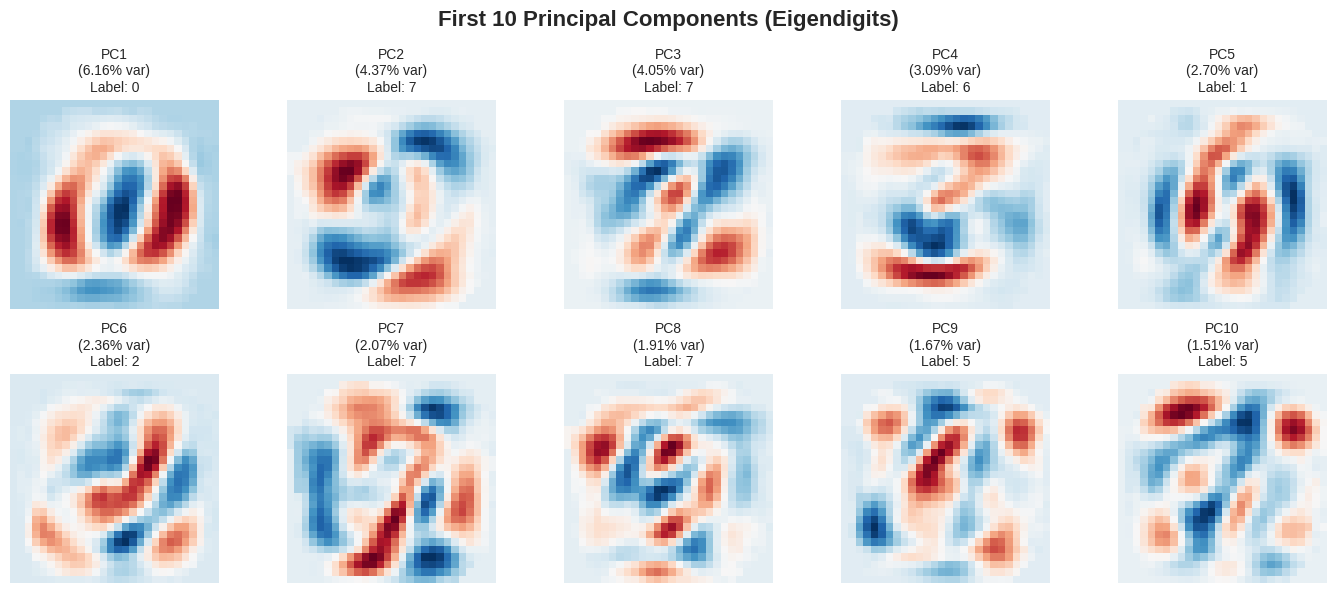


Interpretation:
- Bright (red) pixels: Positive contribution to the component
- Dark (blue) pixels: Negative contribution to the component
- These components capture the most important patterns in digit images


In [11]:
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
fig.suptitle('First 10 Principal Components (Eigendigits)', fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.45)

y_numeric = y.astype(int)
projections = X_pca_full  # full PCA projections computed earlier
rep_labels = []
for i in range(10):
    comp_proj = projections[:, i]
    mean_by_label = [np.mean(comp_proj[y_numeric == lbl]) for lbl in range(10)]
    rep_labels.append(int(np.argmax(np.abs(mean_by_label))))

for i, ax in enumerate(axes.flat):
    # Reshape principal component to 28x28
    component = pca_full.components_[i].reshape(28, 28)

    # Plot the component
    im = ax.imshow(component, cmap='RdBu_r')
    ax.set_title(f'PC{i+1}\n({explained_variance[i]*100:.2f}% var)\nLabel: {rep_labels[i]}', fontsize=10)
    ax.axis('off')

# plt.colorbar(im, ax=axes.ravel().tolist(), label='Pixel Weight', fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Bright (red) pixels: Positive contribution to the component")
print("- Dark (blue) pixels: Negative contribution to the component")
print("- These components capture the most important patterns in digit images")

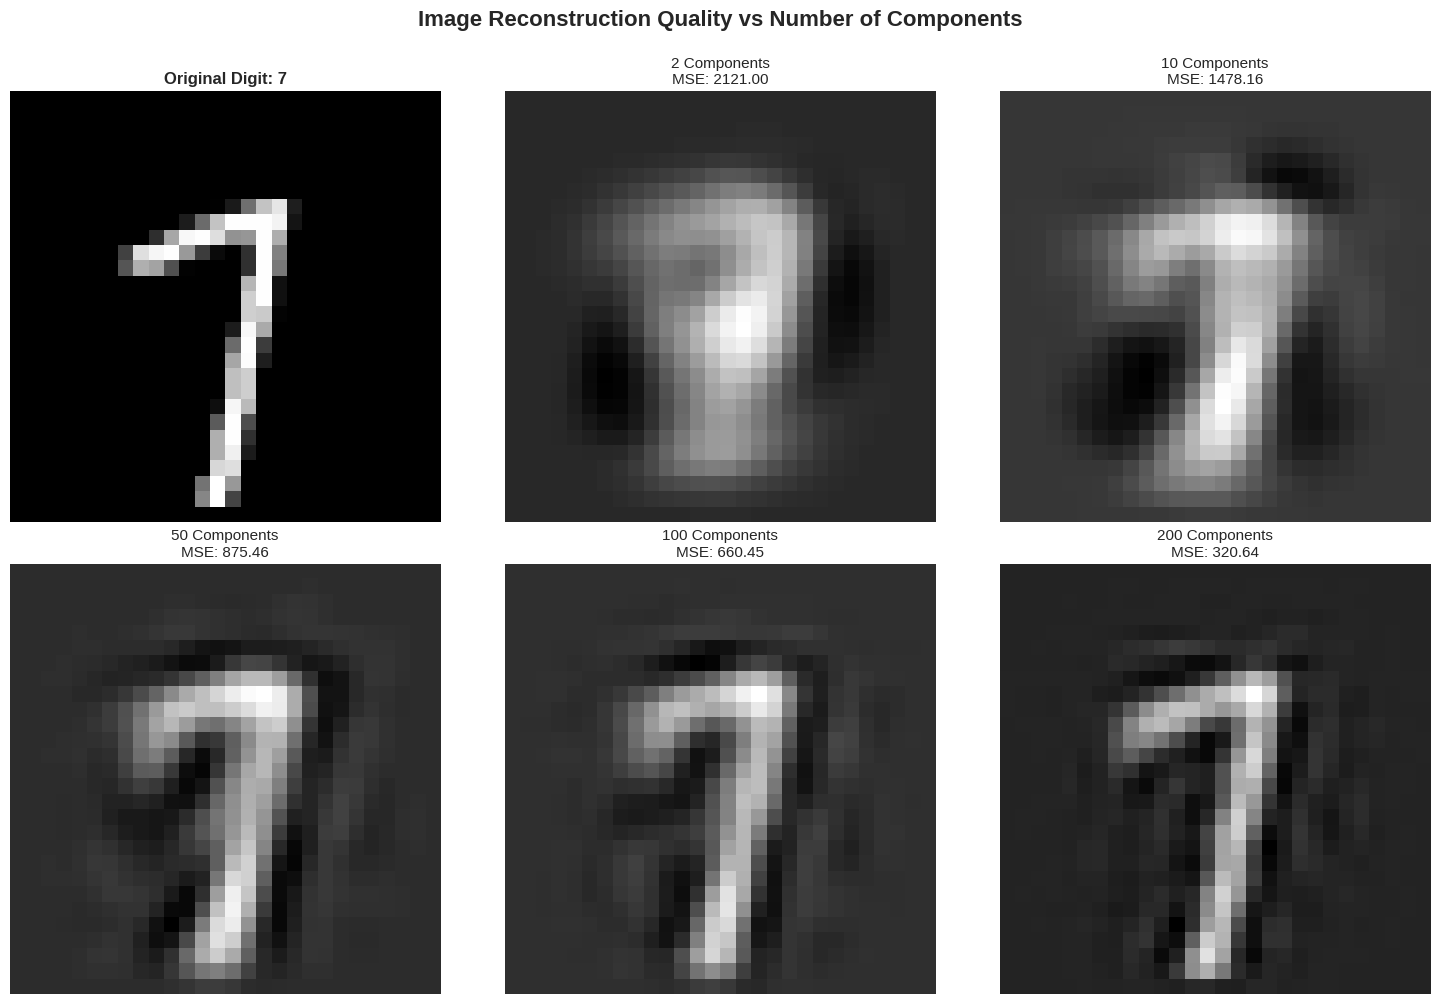

In [12]:
# Select a sample digit to reconstruct
sample_idx = 42
original_image = X.iloc[sample_idx].values.reshape(28, 28)
original_scaled = X_scaled[sample_idx]

# Reconstruct with different numbers of components
n_components_list = [2, 10, 50, 100, 200]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot original
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title(f'Original Digit: {y.iloc[sample_idx]}', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Reconstruct and plot
for idx, n_comp in enumerate(n_components_list, 1):
    # Transform and inverse transform
    pca_temp = PCA(n_components=n_comp)
    X_proj = pca_temp.fit_transform(X_scaled)
    X_reconstructed = pca_temp.inverse_transform(X_proj[sample_idx].reshape(1, -1))

    # Unscale
    reconstructed = scaler.inverse_transform(X_reconstructed).reshape(28, 28)

    # Calculate reconstruction error
    mse = np.mean((original_image - reconstructed) ** 2)

    axes[idx].imshow(reconstructed, cmap='gray')
    axes[idx].set_title(f'{n_comp} Components\nMSE: {mse:.2f}', fontsize=11)
    axes[idx].axis('off')

plt.suptitle('Image Reconstruction Quality vs Number of Components',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

Calculating reconstruction errors...


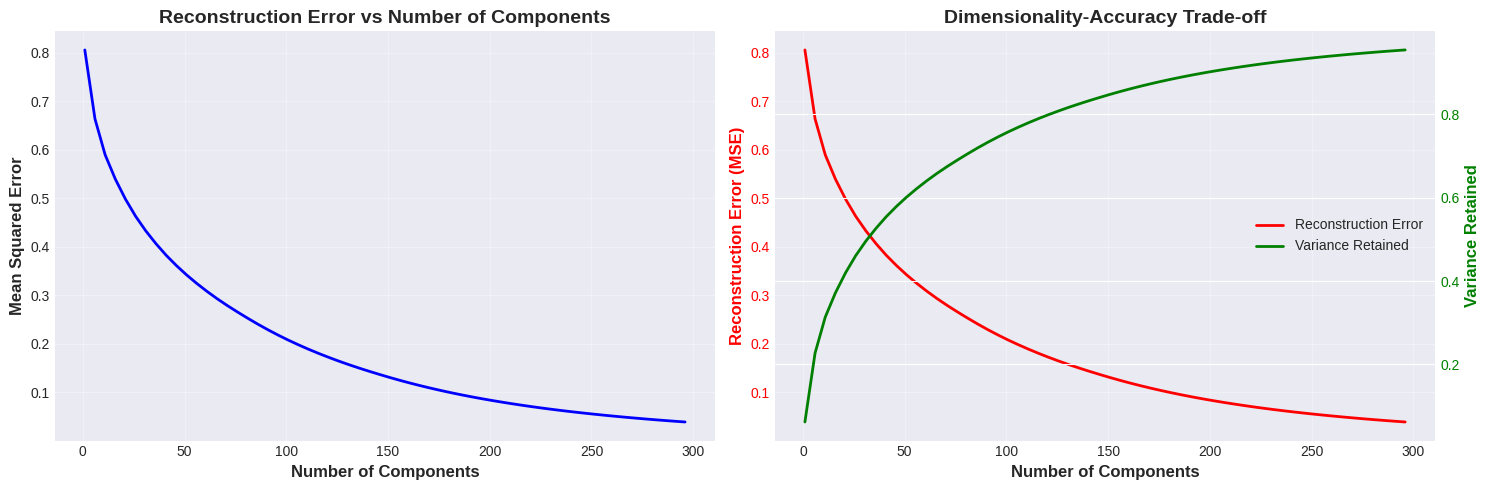

In [13]:
# Calculate reconstruction error for different numbers of components
component_range = range(1, 301, 5)
reconstruction_errors = []

print("Calculating reconstruction errors...")
for n_comp in component_range:
    pca_temp = PCA(n_components=n_comp)
    X_proj = pca_temp.fit_transform(X_scaled)
    X_reconstructed = pca_temp.inverse_transform(X_proj)

    # Mean squared error
    mse = np.mean((X_scaled - X_reconstructed) ** 2)
    reconstruction_errors.append(mse)

# Plot reconstruction error
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Reconstruction Error vs Components
ax1.plot(component_range, reconstruction_errors, 'b-', linewidth=2)
ax1.set_xlabel('Number of Components', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Squared Error', fontsize=12, fontweight='bold')
ax1.set_title('Reconstruction Error vs Number of Components', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Trade-off (Dimensionality vs Error)
ax2.plot(component_range, reconstruction_errors, 'r-', linewidth=2, label='Reconstruction Error')
ax2_twin = ax2.twinx()
variance_at_components = [cumulative_variance[n-1] for n in component_range]
ax2_twin.plot(component_range, variance_at_components, 'g-', linewidth=2, label='Variance Retained')

ax2.set_xlabel('Number of Components', fontsize=12, fontweight='bold')
ax2.set_ylabel('Reconstruction Error (MSE)', fontsize=12, fontweight='bold', color='r')
ax2_twin.set_ylabel('Variance Retained', fontsize=12, fontweight='bold', color='g')
ax2.set_title('Dimensionality-Accuracy Trade-off', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='y', labelcolor='r')
ax2_twin.tick_params(axis='y', labelcolor='g')

# Combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "=" * 70)
print("SUMMARY AND RECOMMENDATIONS")
print("=" * 70)

print("\n📌 KEY FINDINGS:")
print("-" * 70)
print(f"✓ Original dimensionality: {X.shape[1]} features (784 pixels)")
print(f"✓ Reduced to 50 components: {cumulative_variance[49]*100:.2f}% variance retained")
print(f"✓ Reduced to 100 components: {cumulative_variance[99]*100:.2f}% variance retained")
print(f"✓ Dimensionality reduction: ~87% reduction with minimal information loss")



SUMMARY AND RECOMMENDATIONS

📌 KEY FINDINGS:
----------------------------------------------------------------------
✓ Original dimensionality: 784 features (784 pixels)
✓ Reduced to 50 components: 59.73% variance retained
✓ Reduced to 100 components: 75.59% variance retained
✓ Dimensionality reduction: ~87% reduction with minimal information loss
